# INTODUÇÃO

A análise de dados trazida aqui nesse estudo visa identificar a relação entre os hábitos alimentares e atividade física interferem no desenvolvimento de sintomas depressivos

Para dados de sintomas depressivos, vamos utilizar dados do Patient Health Questionnaire-9 (PHQ-9).

Para hábitos alimentares, vamos utilizar dados do Healthy Eating Index (HEI), enquanto atividades físicas são avaliadas pelos dados do Physical Activity Guidelines for Americans (PAGA).

Os bancos de dados utilizados foram fornecidos e são:
 - PAG_HEI.csv: banco de dados contendo 9424 observações de crianças e adultos pesquisados no NHANES 2005-2006
 - DEMO_PHQ.csv: banco de dados contendo 5334 observações de adultos pesquisados no NHANES 2005-2006

Para o banco de dados PAG_HEI.csv, que avalia o grau de sintomas depressivos dos indivíduos

SEQN: Identificador único do respondente

PAG_MINW: Tempo total semanal de atividade aeróbica moderada-vigorosa em minutos segundo o Physical Activity Guideline (PAG)

ADHERENCE: Grupo de aderência ao Physical Activity Guideline (PAG)

HEI2015C1_TOTALVEG: Healthy Eating Index - Componente 1 - Total de Vegetais

HEI2015C2_GREEN_AND_BEAN: Healthy Eating Index - Componente 2 - Verduras verde-
escuras e leguminosas

HEI2015C3_TOTALFRUIT: Healthy Eating Index - Componente 3 - Frutas totais

HEI2015C4_WHOLEFRUIT: Healthy Eating Index - Componente 4 - Frutas in natura

HEI2015C5_WHOLEGRAIN: Healthy Eating Index - Componente 5 - Grãos integrais

HEI2015C6_TOTALDAIRY: Healthy Eating Index - Componente 6 - Laticínios

HEI2015C7_TOTPROT: Healthy Eating Index - Componente 7 - Proteínas

HEI2015C8_SEAPLANT_PROT: Healthy Eating Index - Componente 8 - Plantas marinhas e proteínas vegetais

HEI2015C9_FATTYACID: Healthy Eating Index - Componente 9 - Ácido-graxo

HEI2015C10_SODIUM: Healthy Eating Index - Componente 10 - Sódio

HEI2015C11_REFINEDGRAIN: Healthy Eating Index - Componente 11 - Grãos refinados

HEI2015C12_SFAT: Healthy Eating Index - Componente 12 - Gordura saturada

HEI2015C13_ADDSUG: Healthy Eating Index - Componente 13 - Açúcares adicionados

HEI2015_TOTAL_SCORE: Healthy Eating Index - Escore total

DPQ010 Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos problemas a seguir:
Pouco interesse ou pouco prazer em fazer as coisas

DPQ020 Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos problemas a seguir:
Se sentiu para baixo, deprimido(a) ou sem perspectiva

DPQ030 Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos problemas a seguir:
Dificuldade para pegar no sono ou permanecer dormindo ou dormiu mais do que o
costume

DPQ040 Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos problemas a seguir:
Se sentiu cansado(a) ou com pouca energia

DPQ050 Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos problemas a seguir:
Falta de apetite ou comeu demais

DPQ060 Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos problemas a seguir:
Se sentiu mal consigo mesmo(a) ou achou que é um fracasso ou que decepcionou sua família ou a você mesmo(a)

DPQ070 Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos problemas a seguir:
Dificuldade para se concentrar nas coisas (como ler o jornal ou ver televisão)

DPQ080 Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos problemas a seguir:
Teve lentidão para se movimentar ou falar (a ponto de outras pessoas
perceberem), ou ao contrário, esteve tão agitado(a) que você ficava andando de
um lado para o outro mais do que costume

DPQ090 Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos problemas a seguir:
Pensou em se ferir de alguma maneira ou que seria melhor estar morto(a)

RIDAGEYR Idade em anos

RIDRETH1 Raça/Etnia

DMDEDUC Escolaridade

INDFMINC Renda anual familiar (US$)

# Tratamento de Dados

## Importando os dados

In [ ]:
# importando as bibliotecas a serem utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
# importando os dados
df_PHQ = pd.read_csv('DEMO_PHQ.csv')
df_HEI = pd.read_csv('PAG_HEI.csv')

FileNotFoundError: ignored

In [ ]:
df_PHQ.head()

In [ ]:
df_PHQ.shape

In [ ]:
df_HEI.head(10)

In [ ]:
df_HEI.shape

## Primeiro, vamos definir os datasets

Utilizando a chave SEQN, vamos deixar nos datasets somente os indivíduos que estiverem em ambos. Isso deve excluir as crianças dos dados de depressão (DEMO_PHQ.csv)

In [ ]:
# unindo os datasets pela chave SEQN, eliminando indivíduos que não estão em ambos
df_comb = df_HEI.set_index('SEQN').join( df_PHQ.set_index('SEQN'), how='inner')

In [ ]:
df_comb

In [ ]:
# definindo os novos datasets, agora somente com adultos
df_HEI_adultos = df_comb.iloc[:,:16]
df_PHQ_adultos = df_comb.iloc[:,16:]

In [ ]:
df_HEI_adultos.shape

In [ ]:
df_PHQ_adultos.shape

## Tratando os dados faltantes de NUTRIÇÃO

In [ ]:
df_HEI_adultos.info()

In [ ]:
# visualizando dados faltantes
# Visualize missing values as a matrix
msno.matrix(df_HEI_adultos)

Como podemos observar, todas as features apresentam 5060 dados não faltantes. Pela matrix, vimos que quando há um dados faltante de uma feature, as outras também estão faltantes. Nesse caso, podemos eliminar esses dados, pois não acrescentam na nossa análise

In [ ]:
# eliminando os dados faltantes de df_HEI_adultos
df_HEI_adultos.dropna(inplace=True)

In [ ]:
df_HEI_adultos.info()

## Tratando os dados faltantes de DEPRESSÃO

In [ ]:
df_PHQ_adultos.info()

In [ ]:
msno.matrix(df_PHQ_adultos)

In [ ]:
# eliminando os dados faltantes de df_PHQ_adultos
# baseado na primeira coluna
# pois vimos que a col INDFMINC também tem alguns dados faltantes,
# porém, que podem ser preenchidos

df_PHQ_adultos.dropna(subset=['DPQ010'], inplace = True)

In [ ]:
df_PHQ_adultos.info()

In [ ]:
# Como a col INDFMINC se refere à renda familiar,
# primeiro vamos verificar como ela se comporta

plt.figure(figsize = (10,6))
sns.histplot(df_PHQ_adultos.INDFMINC)

In [ ]:
# Nesse caso, o melhor é preencher os dados faltantes com a mediana
df_PHQ_adultos.INDFMINC.fillna(df_PHQ_adultos.INDFMINC.median(), inplace=True)

In [ ]:
df_PHQ_adultos.info()

## Avaliando Respostas 7 (não quis) e 9 (não soube) em df_PHQ_adultos

In [ ]:
# vamos ver como estão os primeiros dados
df_PHQ_adultos.head()

In [ ]:
# printando alguns dados estatísticos de df_HEI_adultos
df_PHQ_adultos.describe()

In [ ]:
# listando as colunas que possuem os valores 7 (não quis) e 9 (não soube)
df_PHQ_adultos_colunas = df_PHQ_adultos.drop(columns=['RIAGENDR','RIDAGEYR','RIDRETH1','INDFMINC'], axis = 1).columns
df_PHQ_adultos_colunas

In [ ]:
# para cada feature, verificar % de respostas 7 e 9
for coluna in df_PHQ_adultos_colunas:
  soma_7 = (df_PHQ_adultos[coluna] == 7).sum()
  total = len(df_PHQ_adultos[coluna])
  porc_7 = round(soma_7/total*100, 2)

  soma_9 = (df_PHQ_adultos[coluna] == 9).sum()
  porc_9 = round(soma_9/total*100, 2)

  print(f'{coluna} - resposta 7: {porc_7}%')
  print(f'{coluna} - resposta 9: {porc_9}%\n')

Como os valores 7 e 9 para cada feature são muito pequenos, decidi substitui-los pela mediana.

Caso correspondessem a uma parcela maior, seria interessante investigar quem são esses indivíduos, e sua relação com alimentação e atividade física, para verificar algum padrão.

In [ ]:
for coluna in df_PHQ_adultos_colunas:
  df_PHQ_adultos[coluna].replace(to_replace = 7,
                         value = df_PHQ_adultos[coluna].median(),
                         inplace = True)
  df_PHQ_adultos[coluna].replace(to_replace = 9,
                         value = df_PHQ_adultos[coluna].median(),
                         inplace = True)
  

Agora que os valores foram substituídos, vamos verificar se há ainda alguma resposta 7 ou 9 remanescente

In [ ]:
# para cada feature, verificar % de respostas 7 e 9
for coluna in df_PHQ_adultos_colunas:
  soma_7 = (df_PHQ_adultos[coluna] == 7).sum()
  total = len(df_PHQ_adultos[coluna])
  porc_7 = round(soma_7/total*100, 2)

  soma_9 = (df_PHQ_adultos[coluna] == 9).sum()
  porc_9 = round(soma_9/total*100, 2)

  print(f'{coluna} - resposta 7: {porc_7}%')
  print(f'{coluna} - resposta 9: {porc_9}%\n')

In [ ]:
df_PHQ_adultos.head()

In [ ]:
df_PHQ_adultos.shape

A feature de Renda Familiar apresenta os valores 77 e 99 como opção de respostas. Vamos ver a proporção de cada uma no dataset

In [ ]:
# para cada feature, verificar % de respostas 77 e 99
soma_77 = (df_PHQ_adultos['INDFMINC'] == 77).sum()
total = len(df_PHQ_adultos['INDFMINC'])
porc_77 = round(soma_77/total*100, 2)

soma_99 = (df_PHQ_adultos['INDFMINC'] == 99).sum()
porc_99 = round(soma_99/total*100, 2)

print(f'INDFMINC - resposta 77: {porc_77}%')
print(f'INDFMINC - resposta 99: {porc_99}%\n')

Como são poucos valores 77 e 99, vou substitui-los pela mediana da feature

In [ ]:
df_PHQ_adultos['INDFMINC'].replace(to_replace = 77,
                                   value = df_PHQ_adultos['INDFMINC'].median(),
                                   inplace = True)
df_PHQ_adultos['INDFMINC'].replace(to_replace = 99,
                                   value = df_PHQ_adultos[coluna].median(),
                                   inplace = True)

In [ ]:
# para cada feature, verificar % de respostas 77 e 99
soma_77 = (df_PHQ_adultos['INDFMINC'] == 77).sum()
total = len(df_PHQ_adultos['INDFMINC'])
porc_77 = round(soma_77/total*100, 2)

soma_99 = (df_PHQ_adultos['INDFMINC'] == 99).sum()
porc_99 = round(soma_99/total*100, 2)

print(f'INDFMINC - resposta 77: {porc_77}%')
print(f'INDFMINC - resposta 99: {porc_99}%\n')

Agora, vamos criar a coluna 'phq9', que soma as colunas 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090'.

In [ ]:
# listando as colunas que serão somadas
df_PHQ_adultos_colunas = df_PHQ_adultos.drop(columns=['DMDEDUC','RIAGENDR','RIDAGEYR','RIDRETH1','INDFMINC'], axis = 1).columns
df_PHQ_adultos_colunas

In [ ]:
df_PHQ_adultos['phq9'] = df_PHQ_adultos[df_PHQ_adultos_colunas].sum(axis=1)

In [ ]:
df_PHQ_adultos

Agora, o próximo passo é criar a coluna phq_grp, que classifica o resultado da coluna phq9

In [ ]:
# definindo valores da coluna 'phq_grp' segundo classificação dada

df_PHQ_adultos.loc[df_PHQ_adultos['phq9'] < 5, 'phq_grp'] = 0
df_PHQ_adultos.loc[(df_PHQ_adultos['phq9'] >= 5) & (df_PHQ_adultos['phq9'] < 10), 'phq_grp'] = 1
df_PHQ_adultos.loc[(df_PHQ_adultos['phq9'] >= 10) & (df_PHQ_adultos['phq9'] < 15), 'phq_grp'] = 2
df_PHQ_adultos.loc[(df_PHQ_adultos['phq9'] >= 15) & (df_PHQ_adultos['phq9'] < 19), 'phq_grp'] = 3
df_PHQ_adultos.loc[df_PHQ_adultos['phq9'] >= 19, 'phq_grp'] = 4

In [ ]:
df_PHQ_adultos

# EDA: ANÁLISE UNIVARIADA

## Definindo os datasets para análise univariada

In [ ]:
print('linhas e colunas dos dados de nutrição:', df_HEI_adultos.shape)
print('linhas e colunas dos dados de depressão:', df_PHQ_adultos.shape)

linhas e colunas dos dados de nutrição: (5060, 16)
linhas e colunas dos dados de depressão: (4836, 16)


Para ficarmos somente com dados de quem está em ambas os datasets, novamente,

Vamos uni-los, para eliminarmos os não coincidentes.

In [ ]:
# unindo os datasets pela chave SEQN, eliminando indivíduos que não estão em ambos
df_comb2 = df_HEI_adultos.join(df_PHQ_adultos, how='inner')

In [ ]:
df_comb2.shape

(4737, 32)

In [ ]:
df_comb2.head()

,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,phq9,phq_grp
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31131,264.711316,2.0,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0,0.0,0.0
31132,1353.348730,3.0,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0,0.0,0.0
31134,1011.478060,3.0,2.845772,1.283933,2.629005,5.000000,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0,0.0,0.0
31139,1729.145497,3.0,5.000000,0.000000,0.991614,0.056664,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0,4.0,0.0
31143,3768.083141,3.0,2.867000,0.389880,5.000000,5.000000,1.444002,5.000000,3.372033,0.000000,0.002362,5.223435,7.787420,0.000000,10.000000,46.086131,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,19,3,4,11.0,6.0,1.0


Para facilitar nessa primeira análise, vamos separar os datasets novamente

In [ ]:
# definindo os novos datasets
df_HEI_adultos = df_comb2.iloc[:,:16]
df_PHQ_adultos = df_comb2.iloc[:,16:]

In [ ]:
df_HEI_adultos

,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
SEQN,,,,,,,,,,,,,,,,
31131,264.711316,2.0,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
31132,1353.348730,3.0,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
31134,1011.478060,3.0,2.845772,1.283933,2.629005,5.000000,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826
31139,1729.145497,3.0,5.000000,0.000000,0.991614,0.056664,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393
31143,3768.083141,3.0,2.867000,0.389880,5.000000,5.000000,1.444002,5.000000,3.372033,0.000000,0.002362,5.223435,7.787420,0.000000,10.000000,46.086131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41466,9.237875,1.0,2.885575,1.260753,5.000000,5.000000,4.607930,2.555736,5.000000,4.672204,4.633477,0.000000,6.580006,8.393244,9.360990,59.949915
41468,173.210162,2.0,5.000000,2.851503,5.000000,5.000000,3.041603,5.000000,3.759596,2.344264,4.780282,3.134216,1.986137,5.850269,10.000000,57.747869
41469,184.711316,2.0,2.555935,0.000000,2.613733,0.000000,0.000000,2.151846,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323


In [ ]:
df_PHQ_adultos

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,phq9,phq_grp
SEQN,,,,,,,,,,,,,,,,
31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0,0.0,0.0
31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0,0.0,0.0
31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0,0.0,0.0
31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0,4.0,0.0
31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,19,3,4,11.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2,58,5,2,3.0,2.0,0.0
41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,2,66,1,1,8.0,10.0,2.0
41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,19,4,4,2.0,2.0,0.0


## Análise Univariada de Nutrição

In [ ]:
df_HEI_adultos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4737 entries, 31131 to 41473
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PAG_MINW                  4737 non-null   float64
 1   ADHERENCE                 4737 non-null   float64
 2   HEI2015C1_TOTALVEG        4737 non-null   float64
 3   HEI2015C2_GREEN_AND_BEAN  4737 non-null   float64
 4   HEI2015C3_TOTALFRUIT      4737 non-null   float64
 5   HEI2015C4_WHOLEFRUIT      4737 non-null   float64
 6   HEI2015C5_WHOLEGRAIN      4737 non-null   float64
 7   HEI2015C6_TOTALDAIRY      4737 non-null   float64
 8   HEI2015C7_TOTPROT         4737 non-null   float64
 9   HEI2015C8_SEAPLANT_PROT   4737 non-null   float64
 10  HEI2015C9_FATTYACID       4737 non-null   float64
 11  HEI2015C10_SODIUM         4737 non-null   float64
 12  HEI2015C11_REFINEDGRAIN   4737 non-null   float64
 13  HEI2015C12_SFAT           4737 non-null   float64
 14  HEI

In [ ]:
df_HEI_adultos.describe()

,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
count,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000
mean,484.863490,2.004433,3.202517,1.794534,2.489617,2.364610,1.770618,3.769826,4.432712,2.586972,4.700483,4.751217,5.821063,6.036239,6.203522,49.923931
std,797.653077,0.918433,1.460227,2.134834,1.949546,2.171624,1.911844,1.593342,1.006482,2.169018,3.234156,3.412203,3.484264,3.182964,3.336104,12.342940
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.059212
25%,41.570439,1.000000,2.064762,0.000000,0.448681,0.000000,0.000000,2.622205,4.164134,0.000000,2.002189,1.586873,2.974336,3.653210,3.716599,40.929704
50%,221.709007,2.000000,3.209060,0.041508,2.318754,2.087721,1.038915,4.944149,5.000000,2.571318,4.429780,4.820850,6.245713,6.377305,6.846888,49.478433
75%,581.986143,3.000000,4.796827,4.435851,4.938134,5.000000,3.397186,5.000000,5.000000,5.000000,7.248504,7.638021,9.270773,8.960351,9.403905,58.062142
max,10777.829099,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,89.529383


In [ ]:
features_HEI_adultos = df_HEI_adultos.columns.to_list()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fda00068250>,
      dtype=object)

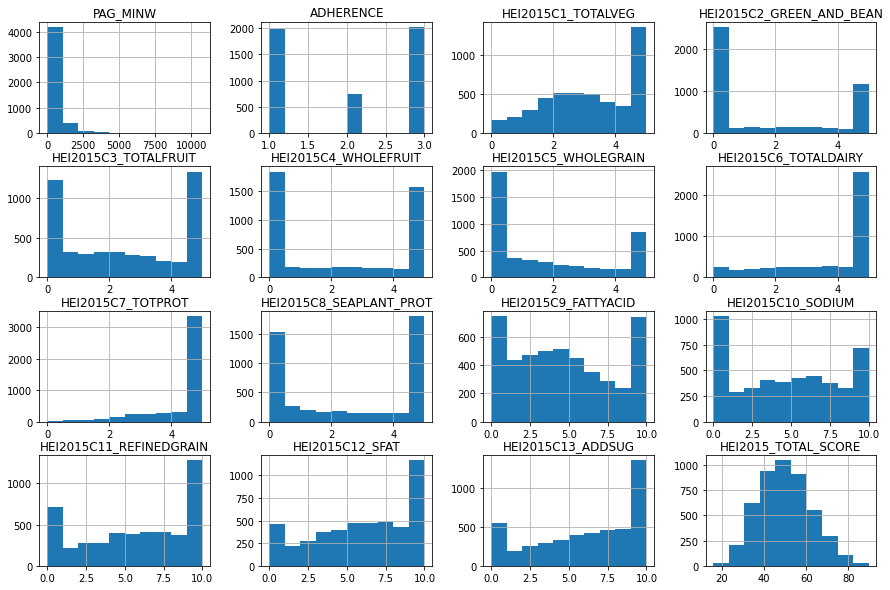

In [ ]:
df_HEI_adultos[features_HEI_adultos].hist(figsize = (15, 10))

In [ ]:
# Separando as features em duas categorias,
# primeiro a de notas de 0 a 5,
# depois de 0 a 10
features_HEI_0_5 = ['HEI2015C1_TOTALVEG', 'HEI2015C2_GREEN_AND_BEAN', 'HEI2015C3_TOTALFRUIT',
                     'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN', 'HEI2015C6_TOTALDAIRY',
                     'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT']
features_HEI_0_10 = ['HEI2015C9_FATTYACID', 'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN',
                      'HEI2015C12_SFAT', 'HEI2015C13_ADDSUG']

In [ ]:
def outliers(df, feature):

    FIQ = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    outliers_sup = df[feature].quantile(0.75) + FIQ
    outliers_inf = df[feature].quantile(0.25) - FIQ
    return print(f'outliers de {feature}:',
                 round((df[feature] > outliers_sup).sum()/len(df[feature])*100,2),'%'),print(f'outliers de {feature}:',
                 round((df[feature] < outliers_inf).sum()/len(df[feature])*100,2),'%')

### Verificando outiliers para PAG_MINW

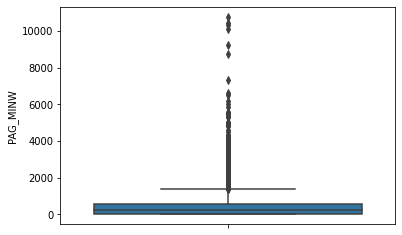

In [ ]:
sns.boxplot(data = df_HEI_adultos,
            y = 'PAG_MINW')

In [ ]:
outliers(df_HEI_adultos, 'PAG_MINW')

outliers de PAG_MINW: 11.42 %
outliers de PAG_MINW: 0.0 %


(None, None)

<Figure size 720x216 with 0 Axes>

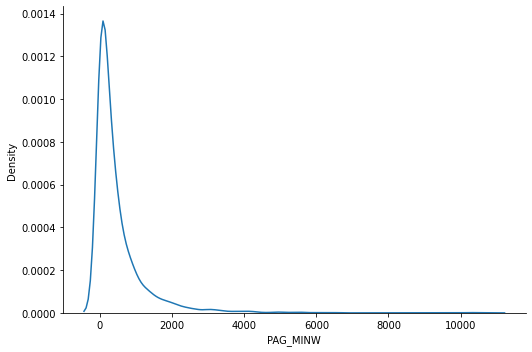

In [ ]:
plt.figure(figsize = (10,3))
ax = sns.displot(data = df_HEI_adultos,
                 x = 'PAG_MINW',
                 kind = 'kde',
                 height = 5,
                 aspect = 1.5)

Como os dados apresentam uma assimetria positiva, vou eliminar somente 2% dos dados, ao invés de todos os 11% dos outliers encontrados.

In [ ]:
limite_superior = df_HEI_adultos['PAG_MINW'].quantile(.98)
df_HEI_adultos = df_HEI_adultos[df_HEI_adultos['PAG_MINW'] < limite_superior]

In [ ]:
df_HEI_adultos.shape

(4642, 16)

In [ ]:
df_HEI_adultos.head()

,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
SEQN,,,,,,,,,,,,,,,,
31131,264.711316,2.0,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
31132,1353.348730,3.0,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
31134,1011.478060,3.0,2.845772,1.283933,2.629005,5.000000,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826
31139,1729.145497,3.0,5.000000,0.000000,0.991614,0.056664,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393
31144,1720.554273,3.0,2.025145,0.000000,2.205125,0.000000,0.000000,5.000000,1.153747,0.000000,6.209888,6.747360,0.000000,7.473184,6.573559,37.388008


### Avaliando as features com notas de 0 a 5

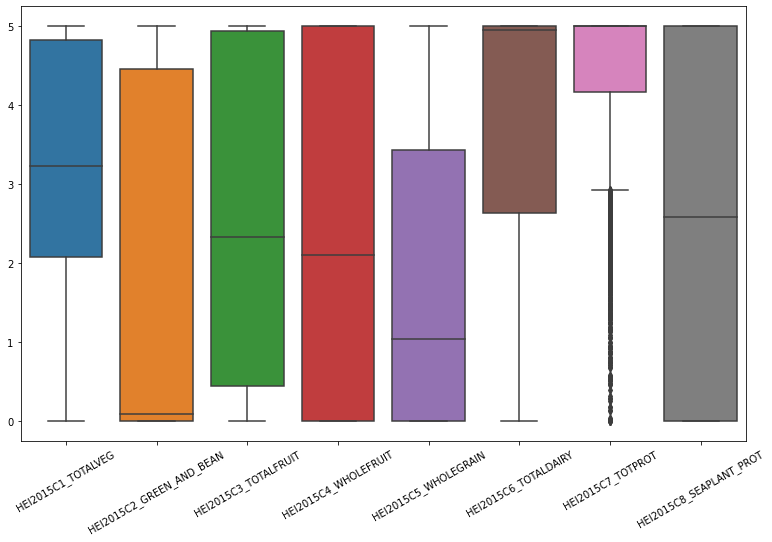

In [ ]:
plt.figure(figsize = (13,8))
ax = sns.boxplot(data = df_HEI_adultos[features_HEI_0_5])
ax.tick_params(axis='x', rotation=30)

A unica feature que precisa de atenção quanto aos outliiers é a TOTPROT

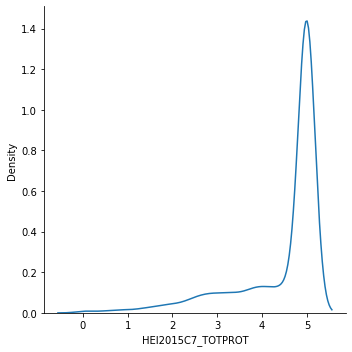

In [ ]:
sns.displot(data = df_HEI_adultos['HEI2015C7_TOTPROT'],
            kind='kde')

In [ ]:
outliers(df_HEI_adultos, 'HEI2015C7_TOTPROT')

outliers de HEI2015C7_TOTPROT: 0.0 %
outliers de HEI2015C7_TOTPROT: 15.04 %


(None, None)

Como a distribuição é assimétrrica negativa, vou eliminar os 2% dos dados, referentes aos outliers

In [ ]:
limite_inferior = df_HEI_adultos['HEI2015C7_TOTPROT'].quantile(.02)
df_HEI_adultos = df_HEI_adultos[df_HEI_adultos['HEI2015C7_TOTPROT'] > limite_inferior]

In [ ]:
df_HEI_adultos.shape

(4549, 16)

### Avaliando as features com notas de 0 a 10

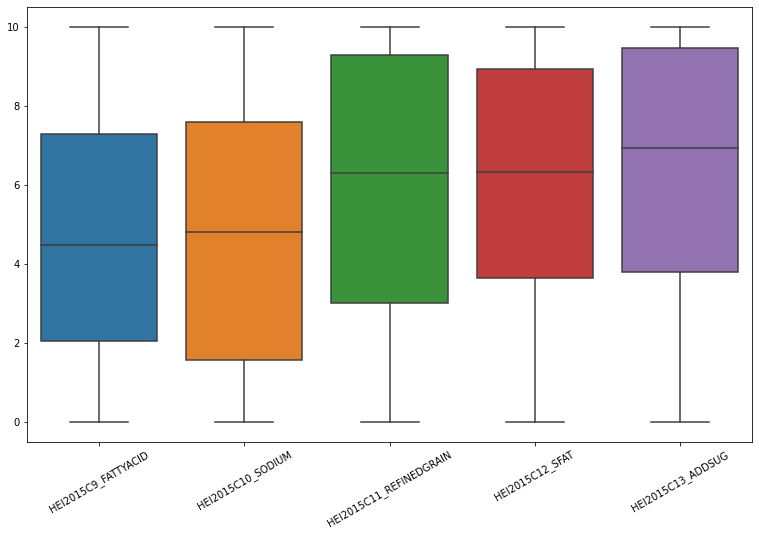

In [ ]:
plt.figure(figsize = (13,8))
ax = sns.boxplot(data = df_HEI_adultos[features_HEI_0_10])
ax.tick_params(axis='x', rotation=30)

Para notas de 0 a 10, não há outliers

### Verificando outiliers para SCORE TOTAL

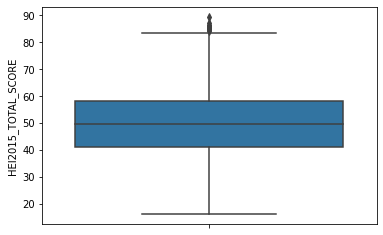

In [ ]:
sns.boxplot(data = df_HEI_adultos,
            y = 'HEI2015_TOTAL_SCORE')

In [ ]:
outliers(df_HEI_adultos, 'HEI2015_TOTAL_SCORE')

outliers de HEI2015_TOTAL_SCORE: 2.33 %
outliers de HEI2015_TOTAL_SCORE: 0.75 %


(None, None)

Nesse caso, como o Total Score é a soma das features anteriores, que já foram tratadas, acredito que podemos manter os dados como estão. Caso em avaliação futura venha a apresentar algum problema para nossa análise, voltamos para ajustar.

## Análise Univariada de Depressão

In [ ]:
df_PHQ_adultos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4737 entries, 31131 to 41473
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DPQ010    4737 non-null   float64
 1   DPQ020    4737 non-null   float64
 2   DPQ030    4737 non-null   float64
 3   DPQ040    4737 non-null   float64
 4   DPQ050    4737 non-null   float64
 5   DPQ060    4737 non-null   float64
 6   DPQ070    4737 non-null   float64
 7   DPQ080    4737 non-null   float64
 8   DPQ090    4737 non-null   float64
 9   RIAGENDR  4737 non-null   int64  
 10  RIDAGEYR  4737 non-null   int64  
 11  RIDRETH1  4737 non-null   int64  
 12  DMDEDUC   4737 non-null   int64  
 13  INDFMINC  4737 non-null   float64
 14  phq9      4737 non-null   float64
 15  phq_grp   4737 non-null   float64
dtypes: float64(12), int64(4)
memory usage: 789.1 KB


In [ ]:
df_PHQ_adultos.describe()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,phq9,phq_grp
count,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000,4737.00000,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000
mean,0.290690,0.300823,0.534093,0.705088,0.311167,0.199704,0.221659,0.130040,0.046654,1.518683,44.84315,2.860460,3.264513,6.931813,2.739920,0.298501
std,0.660914,0.648596,0.868307,0.870040,0.696477,0.554291,0.586528,0.449731,0.272117,0.499704,19.85118,1.114702,1.242678,3.131917,3.743451,0.677822
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.00000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,27.00000,3.000000,2.000000,4.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,43.00000,3.000000,3.000000,7.000000,1.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,61.00000,4.000000,4.000000,10.000000,4.000000,0.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,85.00000,5.000000,5.000000,13.000000,27.000000,4.000000


In [ ]:
df_PHQ_adultos.head()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,phq9,phq_grp
SEQN,,,,,,,,,,,,,,,,
31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0,0.0,0.0
31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0,0.0,0.0
31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0,0.0,0.0
31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0,4.0,0.0
31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,19,3,4,11.0,6.0,1.0


In [ ]:
columns_DPQ = df_PHQ_adultos.columns.drop(['RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'DMDEDUC',
                             'INDFMINC', 'phq9', 'phq_grp'])

In [ ]:
columns_DPQ

Index(['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070',
       'DPQ080', 'DPQ090'],
      dtype='object')

In [ ]:
columns_DPQ.get_loc('DPQ010')

0

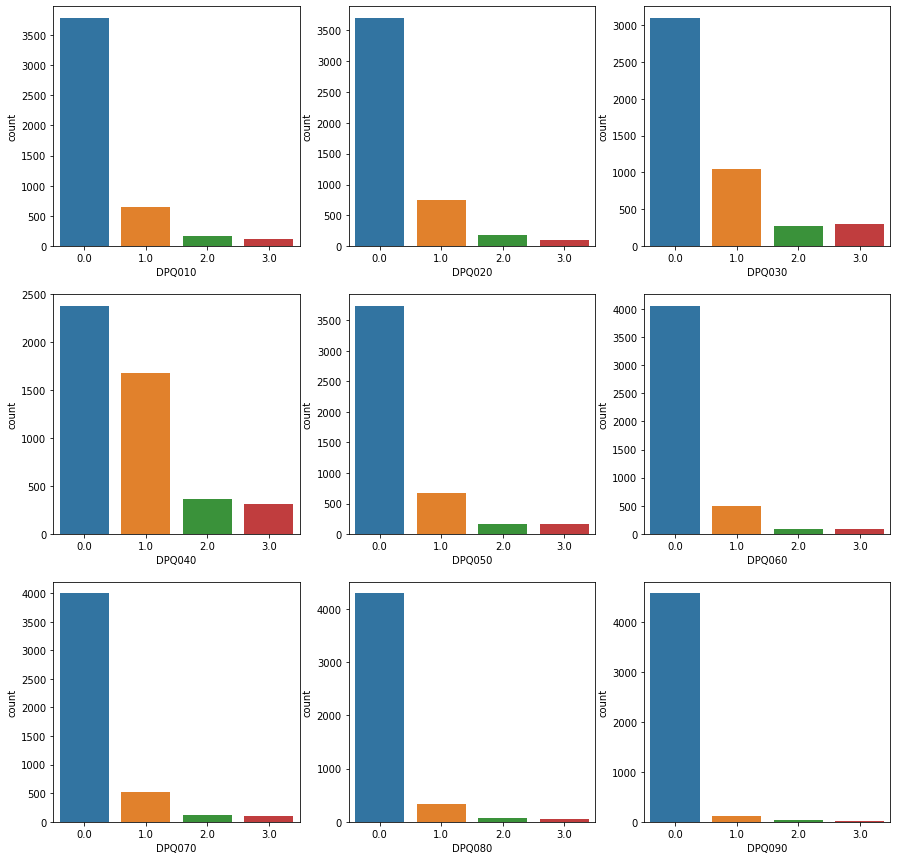

In [ ]:
# criando espaços de subplots
fig = plt.figure(figsize=(15, 15))

for column in columns_DPQ:
  ax = fig.add_subplot(3, 3, columns_DPQ.get_loc(column)+1)
  sns.countplot(data = df_PHQ_adultos, x = column)
  

Observa-se que, para a maioria das features, há predominância de respostas 0 e 1.

No entanto, para cada feature, há uma parcela da dos indivíduos que responderam 2 ou 3. 

### Distribuição de Gênero

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


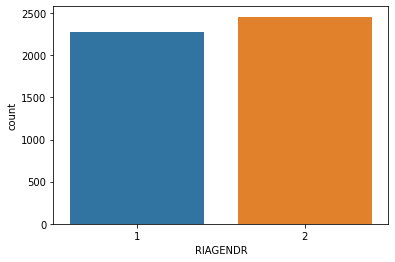

In [ ]:
sns.countplot(df_PHQ_adultos['RIAGENDR'])

In [ ]:
df_PHQ_adultos['RIAGENDR'].value_counts(normalize = True)*100

2    51.868271
1    48.131729
Name: RIAGENDR, dtype: float64

A distribuição de sexos é parecida

### Idade

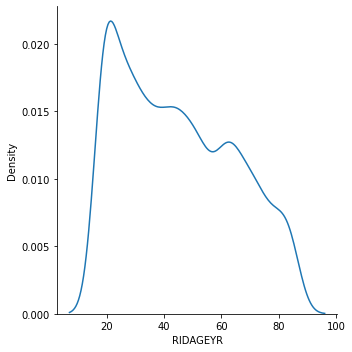

In [ ]:
sns.displot(df_PHQ_adultos['RIDAGEYR'],
            kind = 'kde')

Observa-se uma maior densidade de idades entre 20 e 30 anos, aproximadamente.

### Etnia

1 = Branco não-hispânico

2 = Negro não-hispânico

3 = Mexicano-americano

4 = Outro

5 = Outro - Hispânico

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


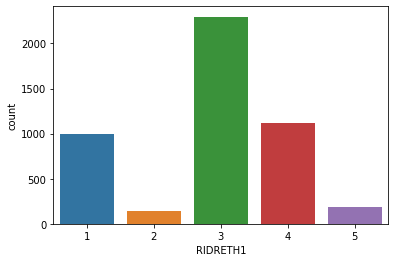

In [ ]:
sns.countplot(df_PHQ_adultos['RIDRETH1'])

Observa-se maior quantidade de Mexicanos-americanos (3)

### Escolaridade

1 = Menor que 9o ano

2 = 9-12o ano

3 = Ensino médio

4 = Ensino superior incompleto

5 = Superior completo ou maior

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


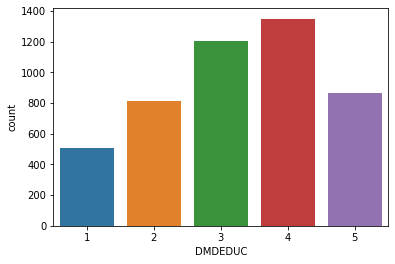

In [ ]:
sns.countplot(df_PHQ_adultos['DMDEDUC'])

Observa-se maior concentração de pessoas com escolaridade de ensino médio e superior incompleto

### Sintomas de Depressão

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


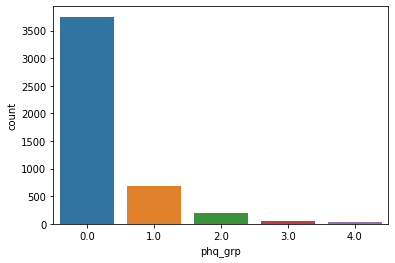

In [ ]:
sns.countplot(df_PHQ_adultos['phq_grp'])

In [ ]:
df_PHQ_adultos['phq_grp'].value_counts(normalize = True)*100

0.0    79.142917
1.0    14.629512
2.0     4.200971
3.0     1.287735
4.0     0.738864
Name: phq_grp, dtype: float64

### Renda anual

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


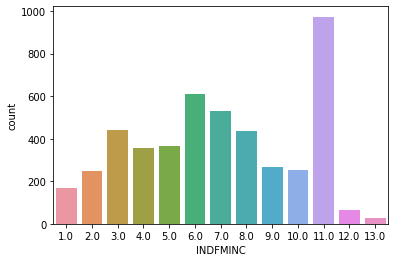

In [ ]:
sns.countplot(df_PHQ_adultos['INDFMINC'])

Observa-se uma discrepância nos dados. Há muito mais famílias com renda maior que 75 mil dólares anuais.

# Análise Bivariada

Vamos começar, unindo nossos datasets

In [ ]:
# unindo os datasets pela chave SEQN, eliminando indivíduos que não estão em ambos
df_total = df_HEI_adultos.join(df_PHQ_adultos, how='inner')

In [ ]:
df_total.head()

,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,phq9,phq_grp
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31131,264.711316,2.0,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0,0.0,0.0
31132,1353.348730,3.0,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0,0.0,0.0
31134,1011.478060,3.0,2.845772,1.283933,2.629005,5.000000,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0,0.0,0.0
31139,1729.145497,3.0,5.000000,0.000000,0.991614,0.056664,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0,4.0,0.0
31149,41.570439,1.0,5.000000,0.000000,2.147766,4.295533,0.000000,4.361618,5.000000,0.000000,4.780404,0.000000,5.138144,5.601160,4.677064,41.001689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,85,3,2,1.0,0.0,0.0


In [ ]:
df_total.shape

(4549, 32)

In [ ]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4549 entries, 31131 to 41473
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PAG_MINW                  4549 non-null   float64
 1   ADHERENCE                 4549 non-null   float64
 2   HEI2015C1_TOTALVEG        4549 non-null   float64
 3   HEI2015C2_GREEN_AND_BEAN  4549 non-null   float64
 4   HEI2015C3_TOTALFRUIT      4549 non-null   float64
 5   HEI2015C4_WHOLEFRUIT      4549 non-null   float64
 6   HEI2015C5_WHOLEGRAIN      4549 non-null   float64
 7   HEI2015C6_TOTALDAIRY      4549 non-null   float64
 8   HEI2015C7_TOTPROT         4549 non-null   float64
 9   HEI2015C8_SEAPLANT_PROT   4549 non-null   float64
 10  HEI2015C9_FATTYACID       4549 non-null   float64
 11  HEI2015C10_SODIUM         4549 non-null   float64
 12  HEI2015C11_REFINEDGRAIN   4549 non-null   float64
 13  HEI2015C12_SFAT           4549 non-null   float64
 14  HEI

In [ ]:
df_total.describe()

,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,phq9,phq_grp
count,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.00000
mean,405.849654,1.985052,3.227358,1.827698,2.501962,2.389789,1.774255,3.765000,4.510538,2.641994,4.735811,4.726003,5.843128,6.013120,6.256679,50.213335,0.286656,0.299406,0.528468,0.701033,0.305122,0.198945,0.219389,0.131018,0.045505,1.517696,45.233458,2.852715,3.265773,6.962189,2.715542,0.29523
std,520.897124,0.916115,1.452498,2.141255,1.946619,2.169855,1.911489,1.593370,0.863922,2.163658,3.229177,3.408375,3.476399,3.180399,3.308737,12.267288,0.654831,0.647403,0.864318,0.866077,0.688595,0.551833,0.584363,0.450719,0.265910,0.499742,19.753851,1.119245,1.248542,3.117301,3.712571,0.67146
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.405498,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.059212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000,0.000000,0.00000
25%,41.570439,1.000000,2.092775,0.000000,0.460248,0.000000,0.000000,2.604662,4.307110,0.038571,2.048680,1.555812,3.001105,3.648229,3.802742,41.295334,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,28.000000,3.000000,2.000000,4.000000,0.000000,0.00000
50%,210.623557,2.000000,3.250298,0.184366,2.344290,2.159197,1.044826,4.930169,5.000000,2.731111,4.477321,4.806310,6.288191,6.320083,6.915702,49.762912,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,43.000000,3.000000,3.000000,7.000000,1.000000,0.00000
75%,554.272517,3.000000,4.833805,4.535865,4.940075,5.000000,3.428571,5.000000,5.000000,5.000000,7.289743,7.596956,9.279208,8.913873,9.461225,58.349553,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,61.000000,4.000000,4.000000,10.000000,4.000000,0.00000
max,2965.357968,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,89.529383,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,85.000000,5.000000,5.000000,13.000000,27.000000,4.00000


## phq9 vs variáveis demográficas

In [ ]:
var_demo = ['RIAGENDR', 'RIDAGEYR', 'RIDRETH1',
            'DMDEDUC', 'INDFMINC']

In [ ]:
df_demo = df_total[var_demo]

In [ ]:
df_demo['phq_grp'] = df_total['phq_grp']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_demo

,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,phq_grp
SEQN,,,,,,
31131,2,44,4,4,11.0,0.0
31132,1,70,3,5,11.0,0.0
31134,1,73,3,3,12.0,0.0
31139,2,18,2,3,11.0,0.0
31149,2,85,3,2,1.0,0.0
...,...,...,...,...,...,...
41466,2,58,5,2,3.0,0.0
41468,2,66,1,1,8.0,2.0
41469,1,19,4,4,2.0,0.0


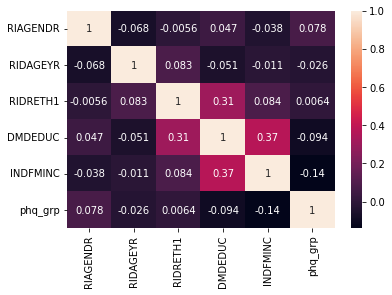

In [ ]:
sns.heatmap(df_demo.corr(),
            annot = True)

A feature que parece ter maior correlação com sintomas de depressão é a de renda familiar anual (INDFMINC)

Vamos ver como se comporta um gráfico de distribuição das rendas, separados por cada grrupo de sintomas de depressão

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


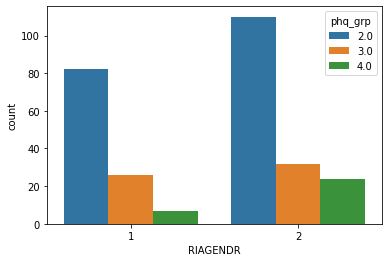

In [ ]:
sns.countplot(df_demo[df_demo.phq_grp.isin([2, 3, 4])]['RIAGENDR'],
              hue = df_demo[df_demo.phq_grp.isin([2, 3, 4])]['phq_grp'])

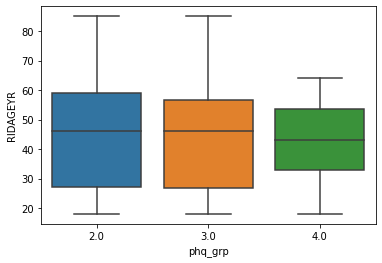

In [ ]:
sns.boxplot(x = 'phq_grp',
            y = 'RIDAGEYR',
            data = df_demo[df_demo.phq_grp.isin([2, 3, 4])])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


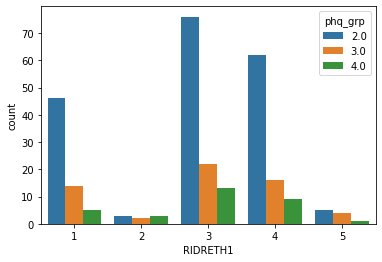

In [ ]:
sns.countplot(df_demo[df_demo.phq_grp.isin([2, 3, 4])]['RIDRETH1'],
              hue = df_demo[df_demo.phq_grp.isin([2, 3, 4])]['phq_grp'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


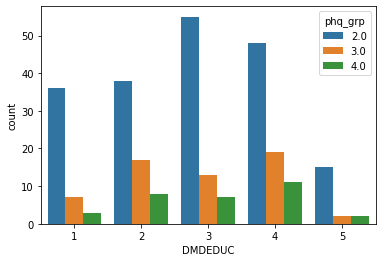

In [ ]:
sns.countplot(df_demo[df_demo.phq_grp.isin([2, 3, 4])]['DMDEDUC'],
              hue = df_demo[df_demo.phq_grp.isin([2, 3, 4])]['phq_grp'])

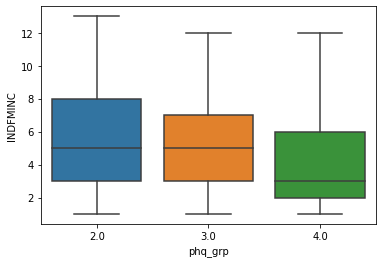

In [ ]:
sns.boxplot(x = 'phq_grp',
            y = 'INDFMINC',
            data = df_demo[df_demo.phq_grp.isin([2, 3, 4])])

O perfil daqueles que apresentam sintomas mais graves de depressão é

Renda familiar menor: de 10000 a 25000 dolares anuais

Escolaridade de ensino médio e superior incompleto

Gênero feminino

## Análise Bivariada de hábitos saudáveis

In [ ]:
df_demo_saud = df_total[var_demo]

In [ ]:
df_demo_saud['HEI2015_TOTAL_SCORE'] = df_total['HEI2015_TOTAL_SCORE']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_demo_saud.head()

,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,HEI2015_TOTAL_SCORE
SEQN,,,,,,
31131,2,44,4,4,11.0,35.553899
31132,1,70,3,5,11.0,63.551696
31134,1,73,3,3,12.0,42.886826
31139,2,18,2,3,11.0,47.074393
31149,2,85,3,2,1.0,41.001689


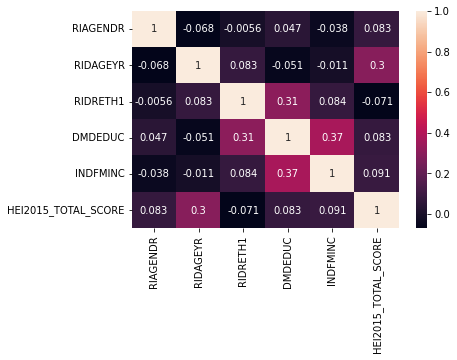

In [ ]:
sns.heatmap(df_demo_saud.corr(),
            annot = True)

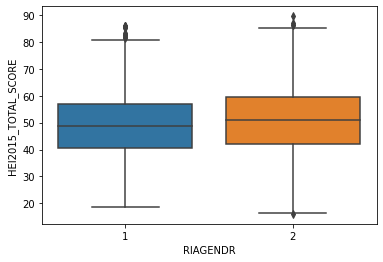

In [ ]:
sns.boxplot(x = 'RIAGENDR',
            y = 'HEI2015_TOTAL_SCORE',
            data = df_demo_saud)

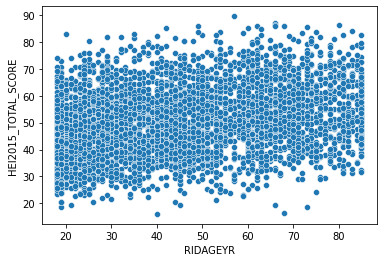

In [ ]:
sns.scatterplot(x = 'RIDAGEYR',
                y = 'HEI2015_TOTAL_SCORE',
                data = df_demo_saud)

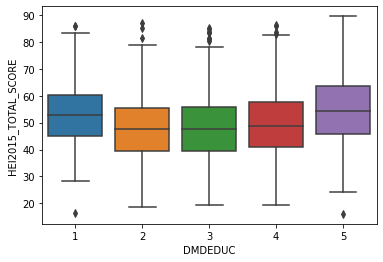

In [ ]:
sns.boxplot(x = 'DMDEDUC',
            y = 'HEI2015_TOTAL_SCORE',
            data = df_demo_saud)

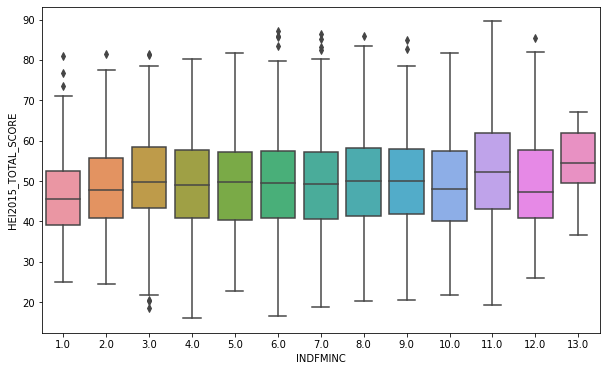

In [ ]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'INDFMINC',
            y = 'HEI2015_TOTAL_SCORE',
            data = df_demo_saud)

Há pouca correlação entre hábitos saudáveis e as features demográficas.

Aparentemente, indicíduos com maiores rendas familiaress anuais, maiores níveis de educação e idades mais avançadas possuem hábitos relativamente mais saudáveis de nutrição.

In [ ]:
vars_scores = ['ADHERENCE', 'HEI2015_TOTAL_SCORE', 'phq_grp']

In [ ]:
df_scores = df_total[vars_scores]

In [ ]:
df_scores

,ADHERENCE,HEI2015_TOTAL_SCORE,phq_grp
SEQN,,,
31131,2.0,35.553899,0.0
31132,3.0,63.551696,0.0
31134,3.0,42.886826,0.0
31139,3.0,47.074393,0.0
31149,1.0,41.001689,0.0
...,...,...,...
41466,1.0,59.949915,0.0
41468,2.0,57.747869,2.0
41469,2.0,42.993323,0.0


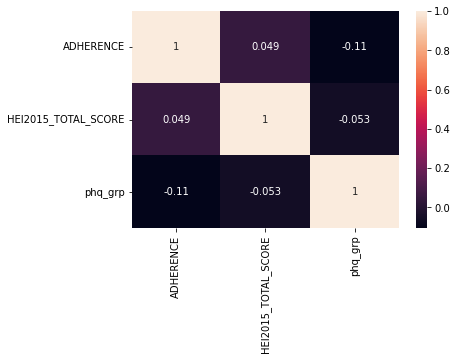

In [ ]:
sns.heatmap(df_scores.corr(),
            annot = True)

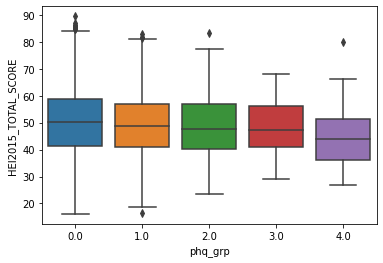

In [ ]:
sns.boxplot(x = 'phq_grp',
            y = 'HEI2015_TOTAL_SCORE',
            data = df_scores)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


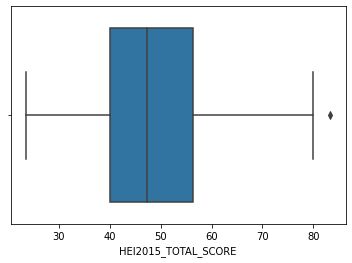

In [ ]:
sns.boxplot(df_scores[df_scores.phq_grp.isin([2,3,4])]['HEI2015_TOTAL_SCORE'])

Aparentemente, há uma tendência de pessoas com hábitos alimentares piores, apresentarem maiores sintomas de depressão

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


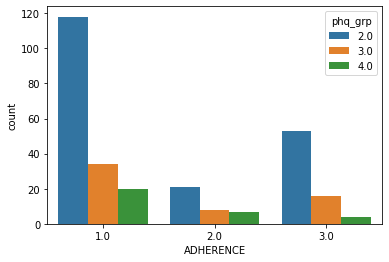

In [ ]:
sns.countplot(df_scores['ADHERENCE'],
              hue = df_scores[df_scores.isin([2,3,4])]['phq_grp'])

Menores níveis de atividade física parecem estar relacionadas a maiores sintomas de depressão

In [ ]:
from scipy import stats

X = df_total.drop('phq_grp', axis = 1)
y = df_total.phq_grp

pd.DataFrame(
    [stats.pearsonr(X[col], y) for col in X.columns], 
    columns=["Corr. Pearson", "p-value"], 
    index=X.columns,
).round(4)

,Corr. Pearson,p-value
PAG_MINW,-0.0898,0.0000
ADHERENCE,-0.1065,0.0000
HEI2015C1_TOTALVEG,-0.0337,0.0230
HEI2015C2_GREEN_AND_BEAN,-0.0227,0.1265
HEI2015C3_TOTALFRUIT,-0.0461,0.0019
HEI2015C4_WHOLEFRUIT,-0.0457,0.0020
HEI2015C5_WHOLEGRAIN,-0.0490,0.0010
HEI2015C6_TOTALDAIRY,-0.0220,0.1384
HEI2015C7_TOTPROT,-0.0363,0.0145
HEI2015C8_SEAPLANT_PROT,-0.0296,0.0459


Segundo a correlação de Pearson, p-valor acima de 0.05 significam que não podemos afirmar que há correlação entre a variável e o target

Dessa forma, RIDAGEYR e RIDAGEYR, que consideramos nas análises anteriores, devem ficar de fora

# Conclusão

O estudo empregado é o observacional

Uma possível fonte de viés é da escolha de um só grupo para a pesquisa. Como a renda de maior que 75000 por ano é discrepante em relação às demais, pode ser que haja um viés.

Apesar da correlação é baixa, acredito que podemos afirmar que hábitos saudáveis possuem um efeito causal na prevenção de depressão.

Uma das fraquezas da análise é a regionalização da amostra. 

Poderia ter sido coletada informação sobre medicamentos utilizados para depressão, relação com a família e amigos.